In [1066]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb

In [1067]:
df = pd.read_csv('Titanic_train.csv')

# Exploratory Data Analysis (EDA):

In [1069]:
df.shape

(891, 12)

In [1070]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1071]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [1072]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1073]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1074]:
df.duplicated().sum()

0

In [1075]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

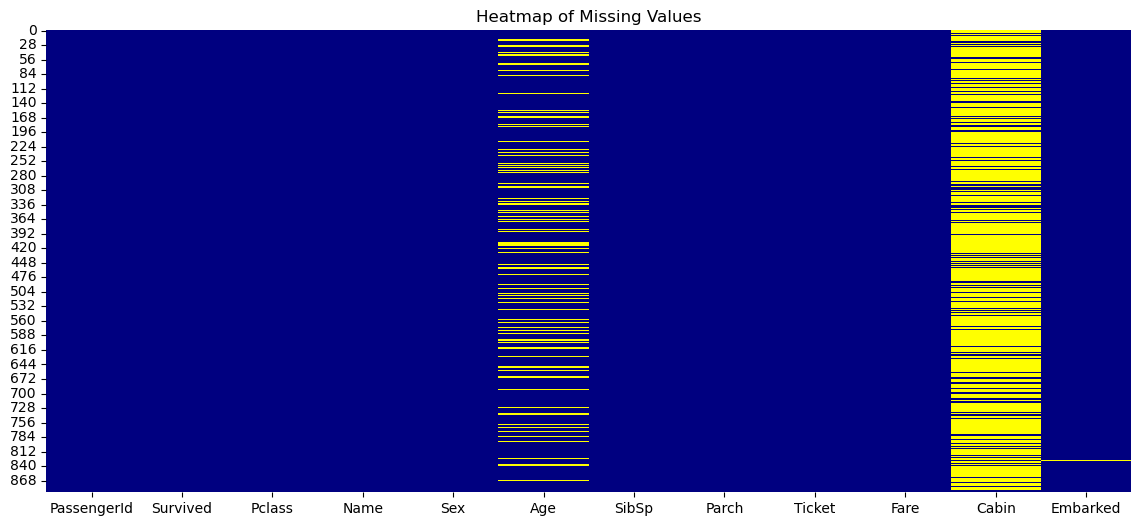

In [1076]:
colours = sns.color_palette(["navy", "yellow"])
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cmap=colours, cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [1077]:
len(df.Cabin)

891

In [1078]:
df['Cabin'].isnull().sum() / len(df.Cabin) * 100

77.10437710437711

In [1079]:
df['Age'].isnull().sum() / len(df.Age) * 100

19.865319865319865

In [1080]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True) 

In [1081]:
for col in df:
    print({col:df[col].nunique()})

{'Survived': 2}
{'Pclass': 3}
{'Sex': 2}
{'Age': 88}
{'SibSp': 7}
{'Parch': 7}
{'Fare': 248}
{'Embarked': 3}


In [1082]:
for col in df:
    print({col:df[col].unique()})

{'Survived': array([0, 1], dtype=int64)}
{'Pclass': array([3, 1, 2], dtype=int64)}
{'Sex': array(['male', 'female'], dtype=object)}
{'Age': array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])}
{'SibSp': array([1, 0, 3, 4, 2, 5, 8], dtype=int64)}
{'Parch': array([0, 1, 2, 5, 3, 4, 6], dtype=int64)}
{'Fare': array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8

In [1083]:
for col in df:
    print(df[col].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


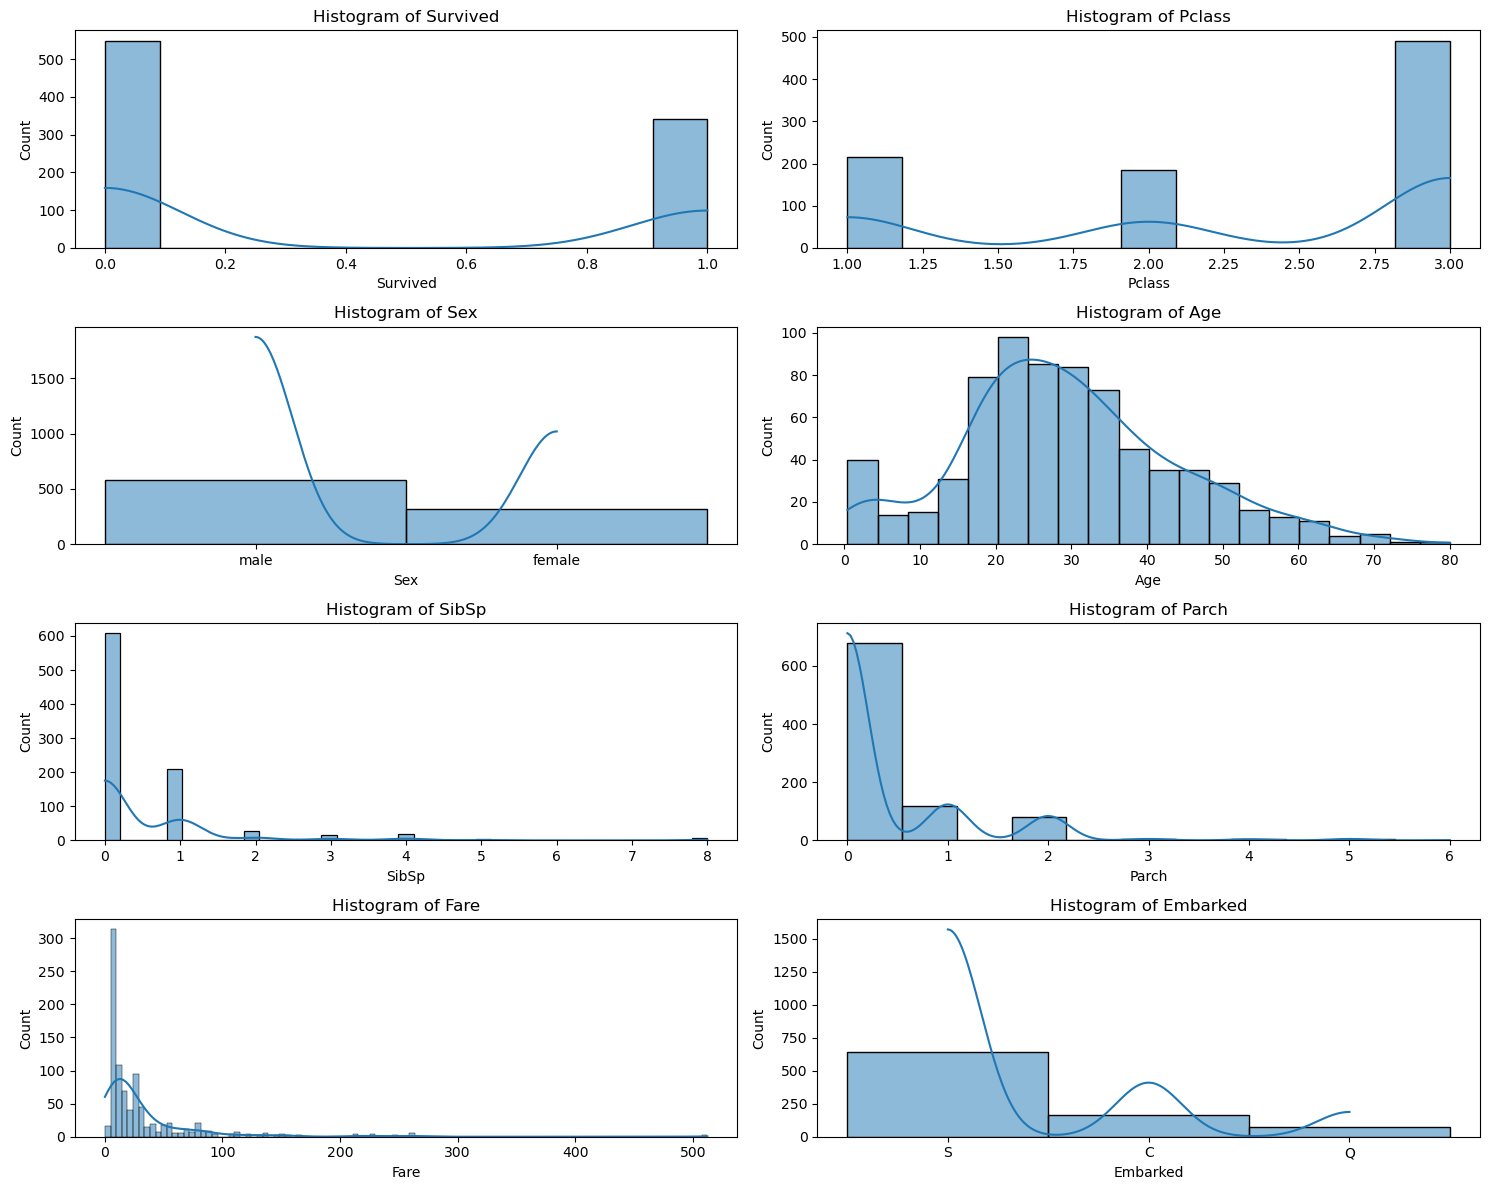

In [1084]:
# Histogram for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

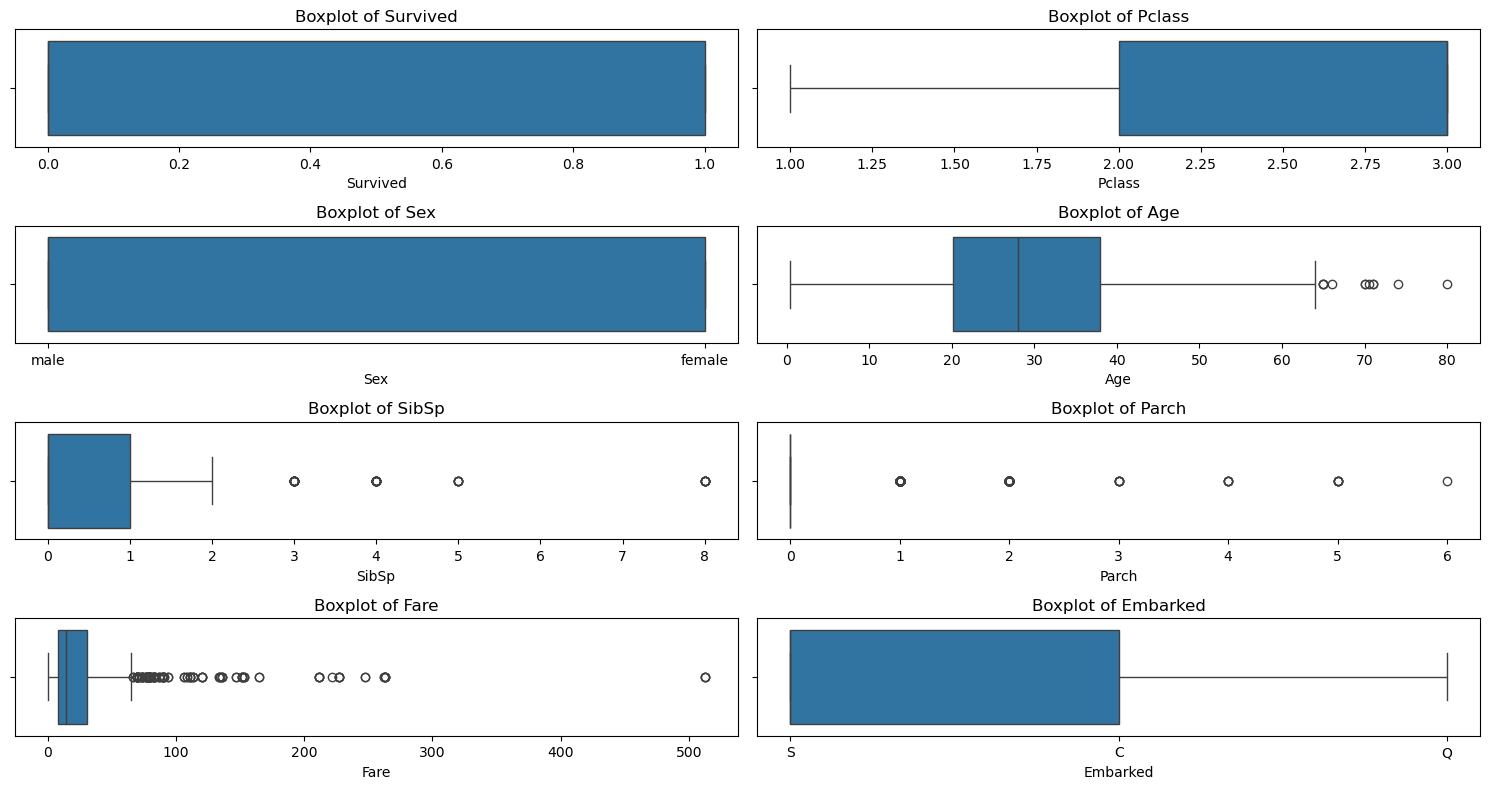

In [1085]:
# Boxplot for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(df.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [1086]:
df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [1087]:
df.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

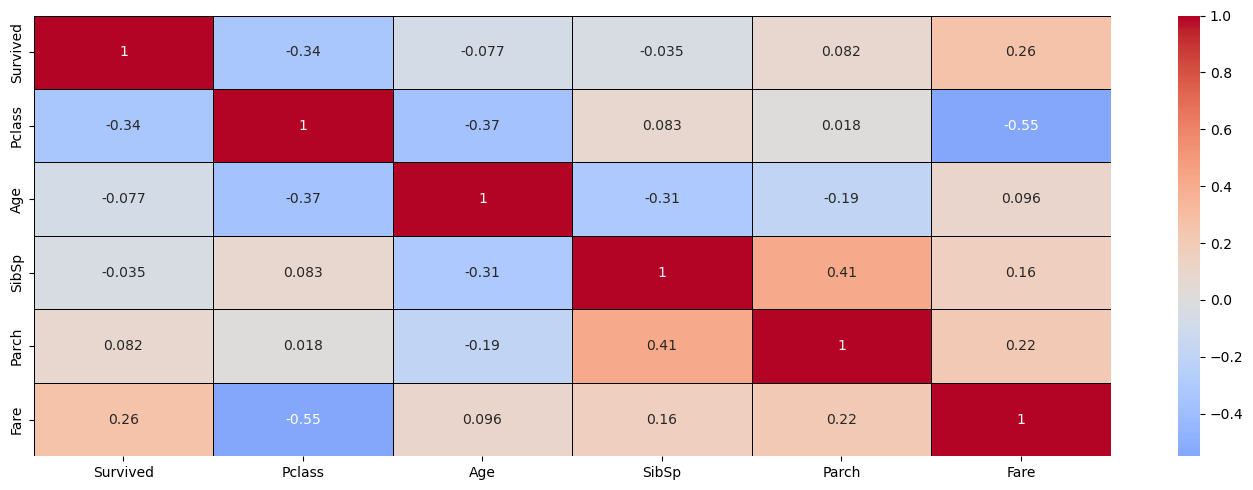

In [1088]:
# correlation heatmap
fig = plt.figure(figsize=(14,5))
sns.heatmap(data=df.corr(numeric_only=True),cmap='coolwarm',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.tight_layout()
plt.show()

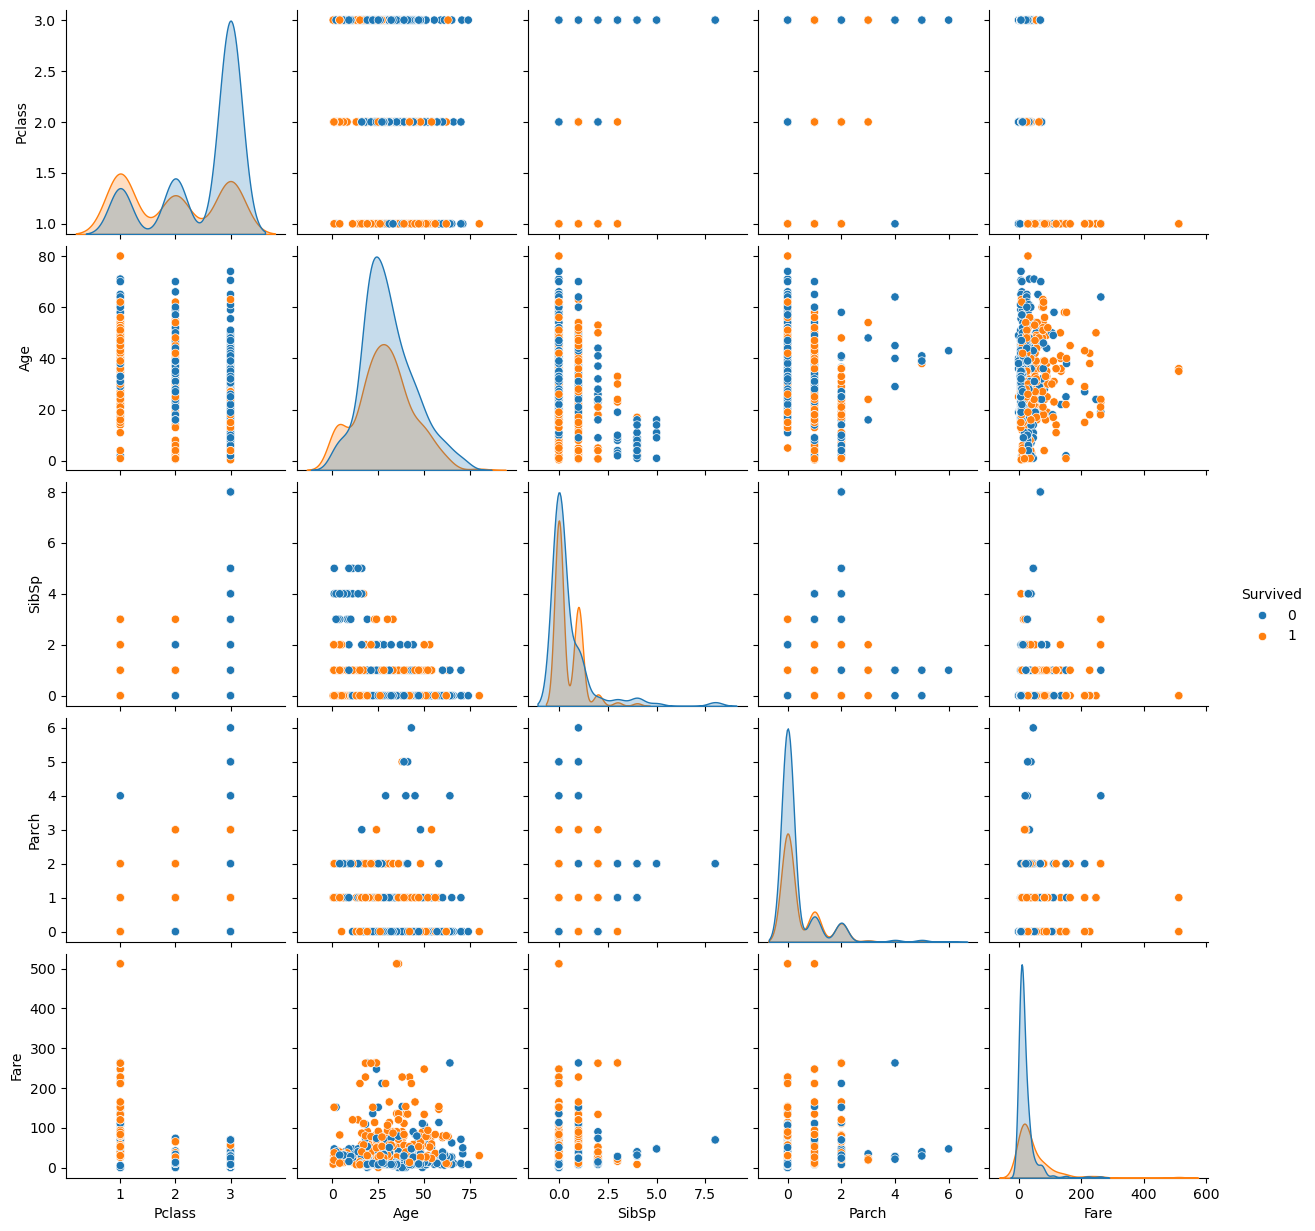

In [1089]:
sns.pairplot(df, hue='Survived')
plt.show()

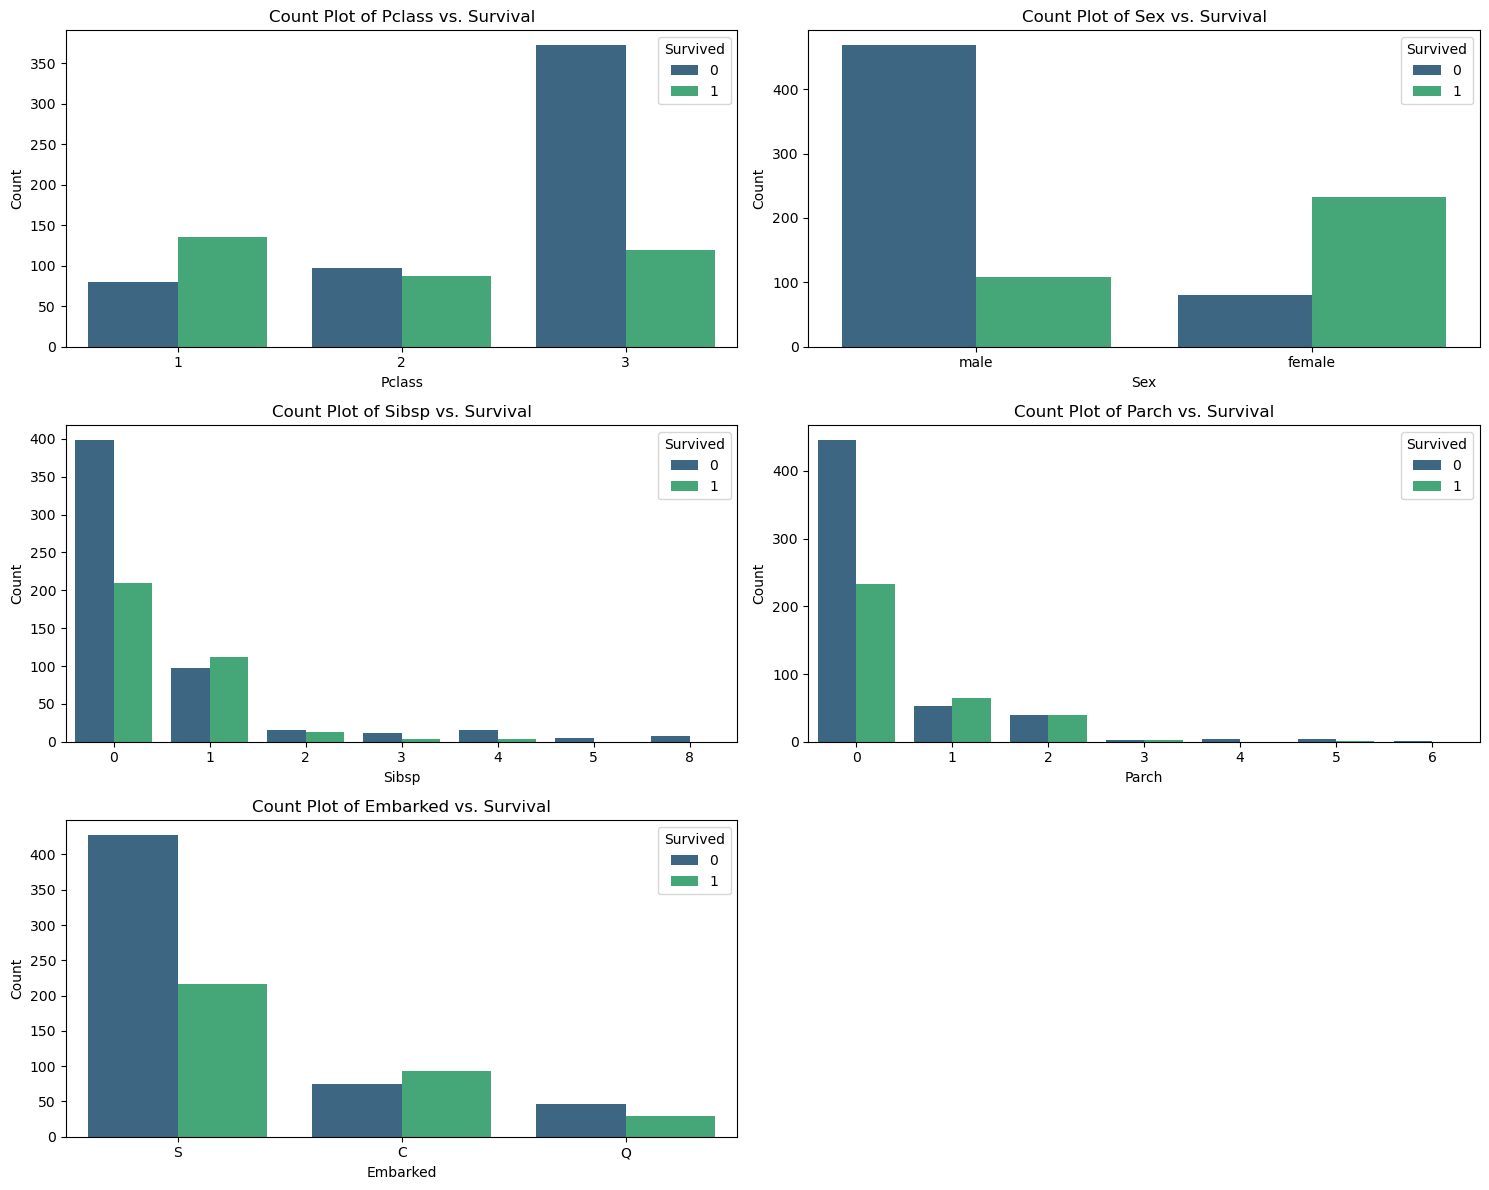

In [1090]:
# List of features to plot
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Number of columns in the subplot grid
n_cols = 2
# Calculate the number of rows required
n_rows = (len(features) + n_cols - 1) // n_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Create count plots for each feature against 'Survived'
for i, feature in enumerate(features):
    sns.countplot(data=df, x=feature, hue='Survived', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature.capitalize()} vs. Survival')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

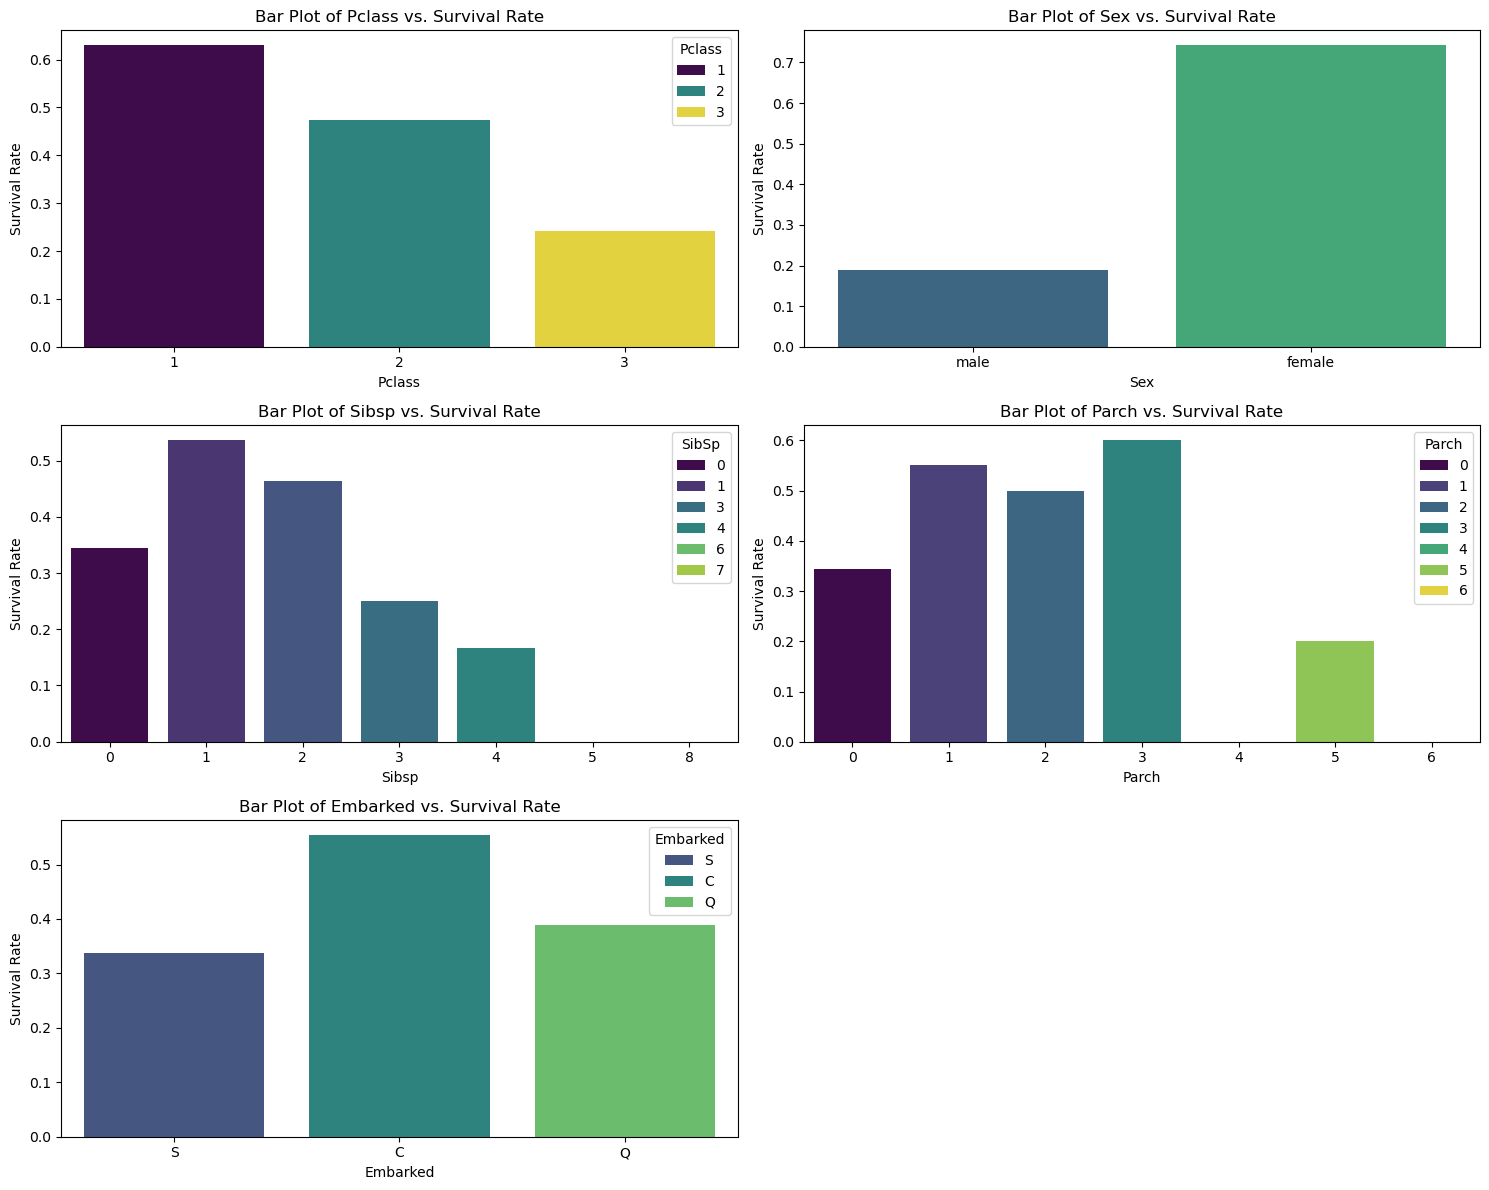

In [1091]:
# List of features to plot (excluding Age and Fare)
features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Number of columns in the subplot grid
n_cols = 2
# Calculate the number of rows required
n_rows = (len(features) + n_cols - 1) // n_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

# Create bar plots for each feature against 'Survived'
for i, feature in enumerate(features):
    sns.barplot(data=df, x=feature, y='Survived', hue=feature, errorbar=None, palette='viridis', ax=axes[i])
    axes[i].set_title(f'Bar Plot of {feature.capitalize()} vs. Survival Rate')
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Survival Rate')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Data Preprocessing:

In [1093]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [1094]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [1095]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [1096]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [1097]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [1098]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [1099]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True, dtype='int64')
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [1100]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male        int64
Embarked_Q      int64
Embarked_S      int64
dtype: object

In [1101]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.565736,1,0,-0.502445,1,0,1
1,1,1,0.663861,1,0,0.786845,0,0,0
2,1,3,-0.258337,0,0,-0.488854,0,0,1
3,1,1,0.433312,1,0,0.420730,0,0,1
4,0,3,0.433312,0,0,-0.486337,1,0,1


# Preprocessing the test data

In [1103]:
df_test = pd.read_csv('Titanic_test.csv')

In [1104]:
df_test.shape

(418, 11)

In [1105]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1106]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [1107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [1108]:
df_test.duplicated().sum()

0

In [1109]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1110]:
# dropping the columns which are not useful
df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [1111]:
# imputing age with median value
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())

In [1112]:
# imputing Fare with median value
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [1113]:
# applying one-hot encoding
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'], drop_first=True, dtype='int64')

In [1114]:
scaler = StandardScaler()
df_test[['Age', 'Fare']] = scaler.fit_transform(df_test[['Age', 'Fare']])
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0.386231,0,0,-0.497413,1,1,0
1,3,1.371370,1,0,-0.512278,0,0,1
2,2,2.553537,0,0,-0.464100,1,1,0
3,3,-0.204852,0,0,-0.482475,1,0,1
4,3,-0.598908,1,1,-0.417492,0,0,1


In [1115]:
# save the cleaned test dataset
df_test.to_csv("Titanic_test_cleaned.csv", index=False)

# Building Predictive Models:

In [1117]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [1118]:
# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [1119]:
# LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [1120]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.71      0.73        69

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [1121]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [1122]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       110
           1       0.78      0.77      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [1123]:
# Parameter grid for LightGBM
lgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 63],
    'max_depth': [-1, 10]
}

In [1124]:
# Grid Search for LightGBM
grid_search_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid=lgb_param_grid, 
                               scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)
print("Best Parameters for LightGBM:", grid_search_lgb.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

In [1125]:
# Parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'min_child_weight': [1, 5]
}

In [1126]:
# Grid Search for XGBoost
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(), param_grid=xgb_param_grid, 
                               scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}


In [1127]:
# Get the best estimator
best_lgb_model = grid_search_lgb.best_estimator_
lgb_preds_best = best_lgb_model.predict(X_test)

In [1128]:
# Get the best estimator
best_xgb_model = grid_search_xgb.best_estimator_
xgb_preds_best = best_xgb_model.predict(X_test)

In [1129]:
# Evaluation metrics for LightGBM
print("LightGBM Performance:")
print("Accuracy: ", accuracy_score(y_test, lgb_preds_best))
print("Precision: ", precision_score(y_test, lgb_preds_best))
print("Recall: ", recall_score(y_test, lgb_preds_best))
print("F1-Score: ", f1_score(y_test, lgb_preds_best))

LightGBM Performance:
Accuracy:  0.7821229050279329
Precision:  0.8
Recall:  0.5797101449275363
F1-Score:  0.6722689075630253


In [1130]:
# Evaluation metrics for XGBoost
print("XGBoost Performance:")
print("Accuracy: ", accuracy_score(y_test, xgb_preds_best))
print("Precision: ", precision_score(y_test, xgb_preds_best))
print("Recall: ", recall_score(y_test, xgb_preds_best))
print("F1-Score: ", f1_score(y_test, xgb_preds_best))

XGBoost Performance:
Accuracy:  0.7932960893854749
Precision:  0.7962962962962963
Recall:  0.6231884057971014
F1-Score:  0.6991869918699187


# Comparative Analysis:

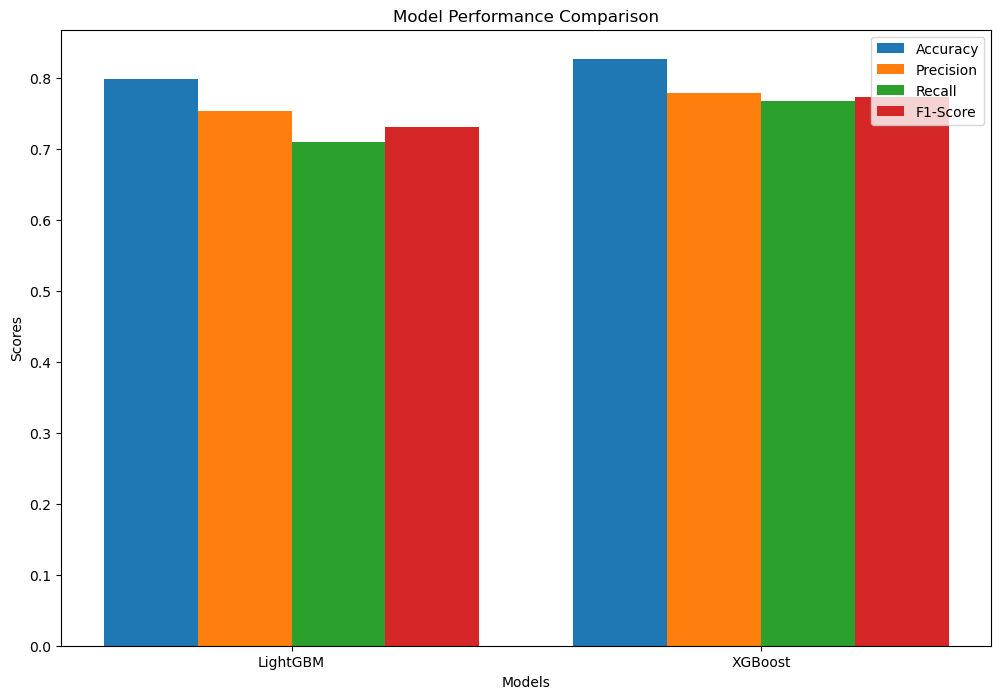

In [1132]:
# Bar plot for model comparison
models = ['LightGBM', 'XGBoost']
accuracy = [accuracy_score(y_test, lgb_pred), accuracy_score(y_test, xgb_pred)]
precision = [precision_score(y_test, lgb_pred), precision_score(y_test, xgb_pred)]
recall = [recall_score(y_test, lgb_pred), recall_score(y_test, xgb_pred)]
f1 = [f1_score(y_test, lgb_pred), f1_score(y_test, xgb_pred)]

x = range(len(models))

plt.figure(figsize=(12, 8))
plt.bar(x, accuracy, width=0.2, label='Accuracy', align='center')
plt.bar([p + 0.2 for p in x], precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.4 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.6 for p in x], f1, width=0.2, label='F1-Score', align='center')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([p + 0.3 for p in x], models)
plt.legend()
plt.show()

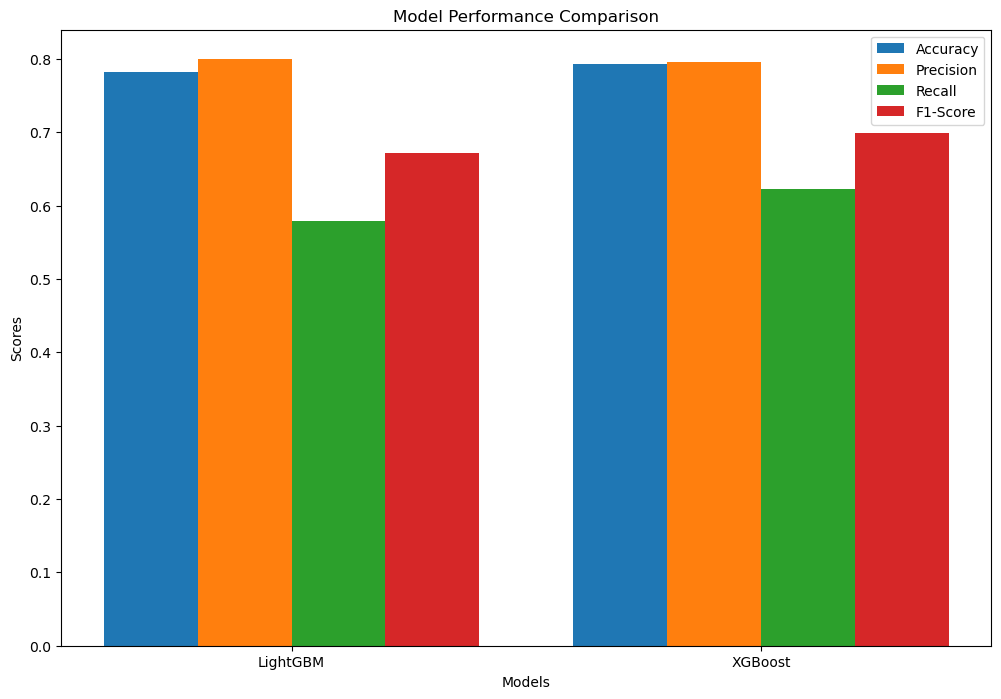

In [1133]:
import matplotlib.pyplot as plt

# Bar plot for model comparison
models = ['LightGBM', 'XGBoost']
accuracy = [accuracy_score(y_test, lgb_preds_best), accuracy_score(y_test, xgb_preds_best)]
precision = [precision_score(y_test, lgb_preds_best), precision_score(y_test, xgb_preds_best)]
recall = [recall_score(y_test, lgb_preds_best), recall_score(y_test, xgb_preds_best)]
f1 = [f1_score(y_test, lgb_preds_best), f1_score(y_test, xgb_preds_best)]

x = range(len(models))

plt.figure(figsize=(12, 8))
plt.bar(x, accuracy, width=0.2, label='Accuracy', align='center')
plt.bar([p + 0.2 for p in x], precision, width=0.2, label='Precision', align='center')
plt.bar([p + 0.4 for p in x], recall, width=0.2, label='Recall', align='center')
plt.bar([p + 0.6 for p in x], f1, width=0.2, label='F1-Score', align='center')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks([p + 0.3 for p in x], models)
plt.legend()
plt.show()

In [1134]:
df_test_cleaned = pd.read_csv('Titanic_test_cleaned.csv')

In [1135]:
best_lgb_model.predict(df_test_cleaned)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1136]:
best_xgb_model.predict(df_test_cleaned)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,